# **Abstract**

Recent advances in computer vision have led to highly-accurate image classification algorithms such as Convolutional Neural Network (CNN) architectures. In this study, we tested and implemented an algorithm based on CNNs in Keras deep learning framework, which is a high level API on top of Tensorflow. Keras has become super popular lately as it’s very easy to build complex models and iterate rapidly.

We have used a Deep learning approach using CNNs to demonstrate how to build a neural network that classifies areas into damaged and undamaged based on the occurence of a natural calamity like earthquake, flood or fire. This is more commonly known as a binary image classification problem. Remote sensing optical imagery is a huge source of information that can be utilized for time critical tasks such as damage detection and assessment in order to provide immediate delivery of relief assistance. These tasks require immediate response. Our proposed model provides good accuracy for damage detection; and we also observe significant execution speed. Instead of using toy datasets to build our model, we have compiled our own multi-class image classification dataset to distinguish the damaged areas from undamaged ones.




# **Theory of CNN**
Convolutional Neural Networks (CNN) are multi-layer fully-connected neural nets. They consist of an input layer, multiple hidden layers, and an output layer. We make the network deeper by increasing the number of hidden layers. CNNs take in an input image, perform a mathematical operation (non-linear activation function such as ReLU, sigmoid) and predict the class or label probabilities of the output. They take in the raw pixel intensity of the input image as a flattened vector. For example, a [30x30] coloured image will be passed as a 3-dimensional matrix to the input layer of CNN.
A Convolutional Neural Network (CNN) has three types of layers as follows:
### **1. Convolutional Layer (CONV)**
This is the layer where CNN learns features from the input image by moving small filters across it. The CONV layer contains filters (for example [3x3] or [5x5]) which are convolved with the input matrix where it learns the features at a given spatial location. For each position of the filter, the dot-product is calculated between the filter and the image pixels under the filter, which results in a single pixel in the output image. So moving the filter across the entire image results in new images, one for each filter in the convolutional layer.
CONV layers have 3 key parameters:

**Depth** — Number of filters used for the convolution operation.

**Stride** — Number of pixels by which filter matrix over the input matrix.

**Padding** — Used to add zeros around the border of the input volume, if it is needed.
### **2. Pooling Layer (POOL)**
This layer is used as an intermediate layer in the network where it downsamples or compresses the incoming volume along the spatial dimensions to reduce over-fitting in the network but retains the most important information. For example, if the input volume is [64x64x12], its downsampled volume would be [32x32x12].
### **3. Fully-Connected Layer (FC)**
In Fully Connected Layer -each node is connected to every other node in the previous layer. This FC layer is often kept as the final layer of a CNN with SIGMOID as its activation function for multi-class classification problems. The FC layer is responsible to predict the final class or label of the input image. Thus, it has an output dimension of [1x1xN] where N denotes the number of classes or labels considered for classification.
A given node in a layer takes the weighted sum of its inputs, and passes it through a non-linear activation function. This is the output of the node, which then becomes the input of another node in the next layer. The signal flows from left to right, and the final output is calculated by performing this procedure for all the nodes. Training this deep neural network means learning the weights associated with all the edges. Note that the computation in TensorFlow is actually done on a batch of images instead of a single image, which makes the computation more 


# **Methodology**
The model has been built from scratch to better match the parameters associated with the manually collated exhaustive dataset consisting of images of three kinds of natural disasters: Floods, Earthquakes and Fires.To ensure the robustness of the model, within each natural disaster it has been taken care to include images from various major and minor incidents that happened across the globe at different time periods. The images are also down-sampled to 200x200, so that the image resolution is uniform across the dataset. The data has been then segregated into two classes damaged (750 images) and undamaged (755 images) and a binary classification model has then been built.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time

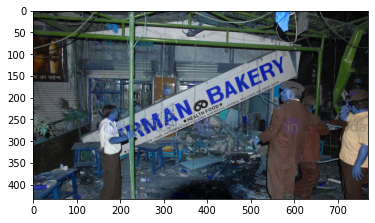

In [ ]:
DATADIR= "/content/gdrive/My Drive/Deep Learning Project/calamity/"
CATEGORIES=["Damaged","Undamaged"]
#going to iterate through the two categories
for category in CATEGORIES:
    path= os.path.join(DATADIR,category)#path to cats or dogs dir
    for img in os.listdir(path):
        img_array= cv2.imread(os.path.join(path,img)) #cv2.IMREAD_RGB)
        plt.imshow(img_array)#,cmap="gray")
        plt.show()
        break
    break

In [ ]:
print(img_array.shape)

(433, 770, 3)


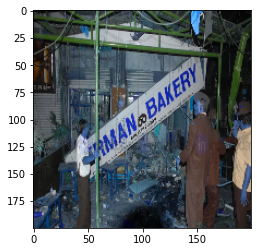

In [ ]:
IMG_SIZE= 200
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [ ]:
new_array.shape

(200, 200, 3)

In [ ]:

training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path= os.path.join(DATADIR,category)#path to dataset
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [ ]:

print(len(training_data))

1505


In [ ]:

new_array.shape

(200, 200, 3)

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
1
1
0
1
0
0


In [ ]:
X_calamity=[]#features
y_calamity=[]#labels

In [ ]:
for features, label in training_data:
    X_calamity.append(features)
    y_calamity.append(label)
    
X_calamity= np.array(X_calamity).reshape(-3,IMG_SIZE,IMG_SIZE,3)

In [ ]:
X_calamity[0].shape

(200, 200, 3)

In [ ]:
X_calamity[1]
y_calamity[1]

0

In [ ]:
X_calamity=X_calamity/255.0 #normalising 

In [ ]:
X_calamity.shape[1:]

(200, 200, 3)

# **The Model**
We have added **six** convolution layers each followed by a max pooling layer of size 2x2.

The input image is processed in the first convolutional layer using the filter-weights. This results in 32 new images, one for each filter in the convolutional layer. (kernel size = 3 implies convolution filters are 3x3 pixels, and we have taken 32 such filters)

These 32 smaller images are then processed in the second convolutional layer. In the second convolution layer, we have 64 new filters (each convolution filter is of 3x3 pixels). 

Keeping the kernel size for each filter constant (3x3 pixels), we further increase the number of filters to 128 in the subsequent conv3 layer. After this, we gradually reduce the number of filters to 64 in conv4, 32 in conv5, and finally to 16 in conv6.

These are then flattened to a single vector which is used as the input to a fully-connected layer with 32 neurons (or elements). This feeds into another fully-connected layer with 2 neurons, one for each class in {0,1}, which determines whether the image belongs to the damaged (class=0) or undamaged (class=1) class.

Sigmoid activation function is applied on the output layer. The loss is measured using binary cross entropy.




In [ ]:
#Model A
model = Sequential()
#First Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=32,input_shape=X_calamity.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                 activation='relu', name='layer_conv2'))
model.add(MaxPooling2D(pool_size=(2,2)))
#third Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=128, padding='same',
                 activation='relu', name='layer_conv3'))
model.add(MaxPooling2D(pool_size=(2,2)))
#drop-out layer 
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=2, strides=2))
#fourth Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=64, padding='same',
                 activation='relu', name='layer_conv4'))
model.add(MaxPooling2D(pool_size=(2,2)))
#fifth Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=32, padding='same',
                 activation='relu', name='layer_conv5'))
model.add(MaxPooling2D(pool_size=(2,2)))
#sixth Convulational layer
model.add(Conv2D(kernel_size=3, strides=1, filters=16, padding='same',
                 activation='relu', name='layer_conv6'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(32))
model.add(Activation("relu"))

#output layer 
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=['accuracy'])


In [ ]:
y_calamity=np.array(y_calamity)
X_calamity=np.array(X_calamity)

In [ ]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_125 (Conv2D)          (None, 198, 198, 32)      896       
_________________________________________________________________
activation_172 (Activation)  (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_216 (MaxPoolin (None, 99, 99, 32)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 99, 99, 64)        18496     
_________________________________________________________________
max_pooling2d_217 (MaxPoolin (None, 49, 49, 64)        0         
_________________________________________________________________
layer_conv3 (Conv2D)         (None, 49, 49, 128)       73856     
_________________________________________________________________
max_pooling2d_218 (MaxPoolin (None, 24, 24, 128)     

The convolutional filters are initially chosen at random, so the classification is done randomly. The error between the predicted and true class of the input image is measured as the so-called cross-entropy. The optimizer then automatically propagates this error back through the Convolutional Network using the chain-rule of differentiation and updates the filter-weights so as to improve the classification error. This is done iteratively multiple times until the classification error is sufficiently low.

# **Results**
All the parameters are set to provide optimal accuracy by minimizing the execution time. 65 samples are used for training, out of which any random 10% of the images are used for validation. We were able to obtain accuracy of almost 90% over just 20 epochs where time taken to run a single epoch was at max 3 seconds.



In [ ]:
#Results 
model.fit(X_calamity,y_calamity,batch_size=65, epochs=20, validation_split=0.1)

Epoch 1/20
21/21 [==============================] - 3s 119ms/step - loss: 0.6900 - accuracy: 0.5303 - val_loss: 0.6725 - val_accuracy: 0.5960
Epoch 2/20
21/21 [==============================] - 2s 86ms/step - loss: 0.6420 - accuracy: 0.5908 - val_loss: 0.6429 - val_accuracy: 0.5960
Epoch 3/20
21/21 [==============================] - 2s 86ms/step - loss: 0.6027 - accuracy: 0.6381 - val_loss: 0.5981 - val_accuracy: 0.6556
Epoch 4/20
21/21 [==============================] - 2s 86ms/step - loss: 0.5619 - accuracy: 0.6883 - val_loss: 0.6477 - val_accuracy: 0.6424
Epoch 5/20
21/21 [==============================] - 2s 86ms/step - loss: 0.5740 - accuracy: 0.6684 - val_loss: 0.6338 - val_accuracy: 0.6556
Epoch 6/20
21/21 [==============================] - 2s 86ms/step - loss: 0.5813 - accuracy: 0.6795 - val_loss: 0.6107 - val_accuracy: 0.6424
Epoch 7/20
21/21 [==============================] - 2s 87ms/step - loss: 0.5874 - accuracy: 0.6861 - val_loss: 0.6070 - val_accuracy: 0.6358
Epoch 8/20
2

In [ ]:
result = model.evaluate(x=X_calamity,
                         y=y_calamity)

48/48 [==============================] - 1s 16ms/step - loss: 0.2588 - accuracy: 0.9003


In [ ]:
_,img_shape, image_shape,_=X_calamity.shape

In [ ]:
image_shape=img_shape,img_shape,3
image_shape

(200, 200, 3)

# **Visualizing the Results**

In [ ]:
#Helper Function to plot images 
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(image_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

### **Plotting images and labels**
We select first 9 images from the input matrix and display their true and predicted class label

In [ ]:
#Predictions
images = X_calamity[0:9]

In [ ]:
cls_true =y_calamity[0:9]

In [ ]:
y_pred = model.predict(x=images)

In [ ]:
cls_pred = np.argmax(y_pred, axis=1)

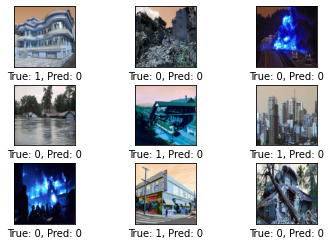

In [ ]:
plot_images(images=images,
            cls_true=cls_true,
            cls_pred=cls_pred)

In [ ]:
#Helper Function to plot incorrect images
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != y_calamity)

    # Get the images from the test-set that have been
    # incorrectly classified.
    images = X_calamity[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = y_calamity[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

We now plot first 9 incorrectly classified images:

In [ ]:
y_pred = model.predict(x=X_calamity)

In [ ]:
cls_pred = np.argmax(y_pred, axis=1)

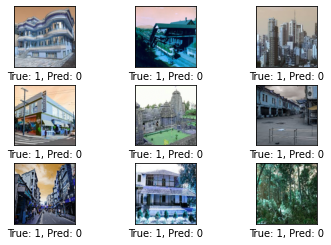

In [ ]:
plot_example_errors(cls_pred)

# **Concluding Remarks**
We have designed a high performance deep learning classification model and applied it on disaster dataset for damage detection. It gives an overall 90% accuracy rate with significant reduction in execution time.
We have found the optimal result after running multiple permutations and combinations of the parameters given the Adam optimizer. The results may change with varying parametric values.
The model can be made more applicable for damage detection by using satellite images and significant execution speed can be observed on GPU K80 High Performance Computing (HPC) platform.

# **References**
· Bhangale, U., Durbha, S., Potnis, A., & Shinde, R. (2019, July). Rapid Earthquake Damage Detection Using Deep Learning from VHR Remote Sensing Images. In IGARSS 2019–2019 IEEE International Geoscience and Remote Sensing Symposium (pp. 2654–2657). IEEE.

· Gogul, I. & Kumar, Sathiesh. (2017). Flower species recognition system using convolution neural networks and transfer learning. 1–6.

· Laboratories, H. (2016, June). Retrieved from Github: https://github.com/Hvass-Labs/TensorFlow-Tutorials

· Ng, A. (2017, November). Deeplearning.ai. Retrieved from Youtube: https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF

· Sharma, V. (2018, October 15). Vinod Sharma’s Blog. Retrieved from https://vinodsblog.com/2018/10/15/everything-you-need-to-know-about-convolutional-neural-networks/